**Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df**

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


In [3]:
wine=pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
#we require to scale the data first before do the clustering

In [4]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [5]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
x=wine.iloc[::,1::]
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
y=wine.iloc[::,0:1:]
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [9]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(x)

In [10]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca_values = pca.fit_transform(df_norm)

In [13]:
pca_values.shape

(178, 13)

In [14]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [15]:
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

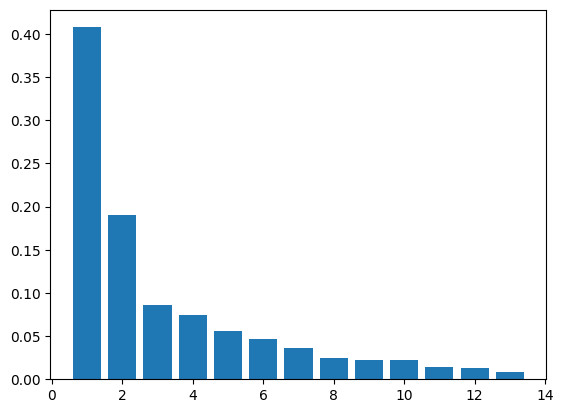

In [18]:
var = pca.explained_variance_ratio_
plt.bar(range(1,len(var)+1),var)

In [23]:
#create dataframe using pca
wine_pca = pd.DataFrame(data=pca_values[:,0:3],columns=['pc1','pc2','pc3'])
wine_pca['Type']= wine['Type']
wine_pca

,pc1,pc2,pc3,Type
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1
...,...,...,...,...
173,0.739510,-0.471901,0.209360,3
174,0.581781,-0.348366,0.083590,3
175,0.626313,-0.546857,-0.030495,3
176,0.572991,-0.425516,-0.094537,3


In [24]:
wine_pca.shape

(178, 4)

**Use Hierarchical Clustering**

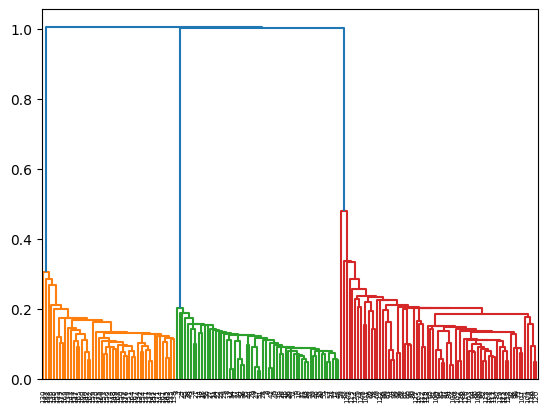

In [25]:
# create dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(wine_pca.iloc[::,0:4], method='single'))

In [26]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [27]:
hc.fit_predict(wine_pca.iloc[::,0:3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [28]:
# save clusters for chart
y_hc = hc.fit_predict(wine_pca.iloc[::,0:3])
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
wine_pca['h_clusterid'] = y_hc

In [30]:
wine_pca

,pc1,pc2,pc3,Type,h_clusterid
0,-0.706336,-0.253193,0.024093,1,0
1,-0.484977,-0.008823,-0.280482,1,0
2,-0.521172,-0.189187,0.196217,1,0
3,-0.821644,-0.580906,0.081110,1,0
4,-0.202546,-0.059467,0.300240,1,0
...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,3,0
174,0.581781,-0.348366,0.083590,3,0
175,0.626313,-0.546857,-0.030495,3,0
176,0.572991,-0.425516,-0.094537,3,0


In [31]:
wine_pca.h_clusterid.value_counts()

0    176
1      1
2      1
Name: h_clusterid, dtype: int64

In [32]:
wine_pca.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [ ]:
# hence we are not getting good clusters using this data

**k Means**

In [33]:
from sklearn.cluster import KMeans

In [34]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(wine_pca.iloc[::,0:3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [35]:
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [36]:
md=pd.Series(model_kmeans.labels_)

In [41]:
wine_pca["labels"]=pd.Series(model_kmeans.labels_)

In [42]:
wine_pca

,pc1,pc2,pc3,Type,h_clusterid,labels,K means labels
0,-0.706336,-0.253193,0.024093,1,0,1,1
1,-0.484977,-0.008823,-0.280482,1,0,1,1
2,-0.521172,-0.189187,0.196217,1,0,1,1
3,-0.821644,-0.580906,0.081110,1,0,1,1
4,-0.202546,-0.059467,0.300240,1,0,1,1
...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,3,0,2,2
174,0.581781,-0.348366,0.083590,3,0,2,2
175,0.626313,-0.546857,-0.030495,3,0,2,2
176,0.572991,-0.425516,-0.094537,3,0,2,2


In [43]:
#we have 0,1 and 2 corresponds to 1,2 and 3 of original data
wine_pca.labels.value_counts()

1    65
0    62
2    51
Name: labels, dtype: int64

In [44]:
wine_pca.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [ ]:
# so k means is giving the close result as of the original data with 3 clusters

In [ ]:
# lets try considering more features

In [45]:
#create dataframe using pca
wine_pca1 = pd.DataFrame(data=pca_values[:,0:4],columns=['pc1','pc2','pc3','pc4'])
wine_pca1['Type']= wine['Type']
wine_pca1

,pc1,pc2,pc3,pc4,Type
0,-0.706336,-0.253193,0.024093,0.013263,1
1,-0.484977,-0.008823,-0.280482,0.075898,1
2,-0.521172,-0.189187,0.196217,-0.015784,1
3,-0.821644,-0.580906,0.081110,0.012235,1
4,-0.202546,-0.059467,0.300240,-0.102051,1
...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,3
174,0.581781,-0.348366,0.083590,0.075226,3
175,0.626313,-0.546857,-0.030495,0.170137,3
176,0.572991,-0.425516,-0.094537,-0.137393,3


In [59]:
model_kmeans1 = KMeans(n_clusters=3)
model_kmeans1.fit(wine_pca1.iloc[::,0:4])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [60]:
model_kmeans1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [62]:
wine_pca1["labels"]=pd.Series(model_kmeans1.labels_)

In [63]:
wine_pca1

,pc1,pc2,pc3,pc4,Type,labels
0,-0.706336,-0.253193,0.024093,0.013263,1,1
1,-0.484977,-0.008823,-0.280482,0.075898,1,1
2,-0.521172,-0.189187,0.196217,-0.015784,1,1
3,-0.821644,-0.580906,0.081110,0.012235,1,1
4,-0.202546,-0.059467,0.300240,-0.102051,1,1
...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,3,0
174,0.581781,-0.348366,0.083590,0.075226,3,0
175,0.626313,-0.546857,-0.030495,0.170137,3,0
176,0.572991,-0.425516,-0.094537,-0.137393,3,0


In [64]:
wine_pca1.labels.value_counts()

1    65
2    62
0    51
Name: labels, dtype: int64

In [65]:
# so this is giving the wrong results as compared with the original data we have we have 0,1 and 2 corresponds to 1,2 and 3 of original data
wine_pca.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [ ]:
# hence we are going with the first kmeans clustering using first 3 principle components i.e. wine_pca

In [66]:
wine_pca.labels.value_counts()

1    65
0    62
2    51
Name: labels, dtype: int64

In [67]:
wine_pca.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64